In [114]:
!pip install mne
import mne as mn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [115]:
raw = mn.io.read_raw_gdf('A01E.gdf',preload=True)

events,Annotations = mn.events_from_annotations(raw)

Extracting EDF parameters from /content/A01E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686999  =      0.000 ...  2747.996 secs...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']


In [116]:
data=mn.io.read_raw_gdf('A01E.gdf')

Extracting EDF parameters from /content/A01E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


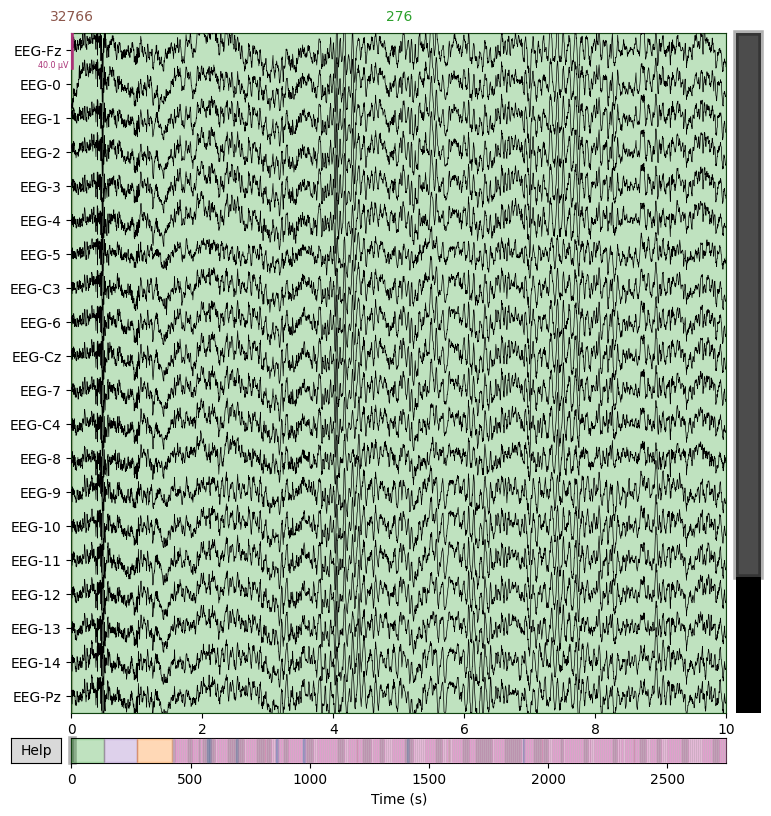

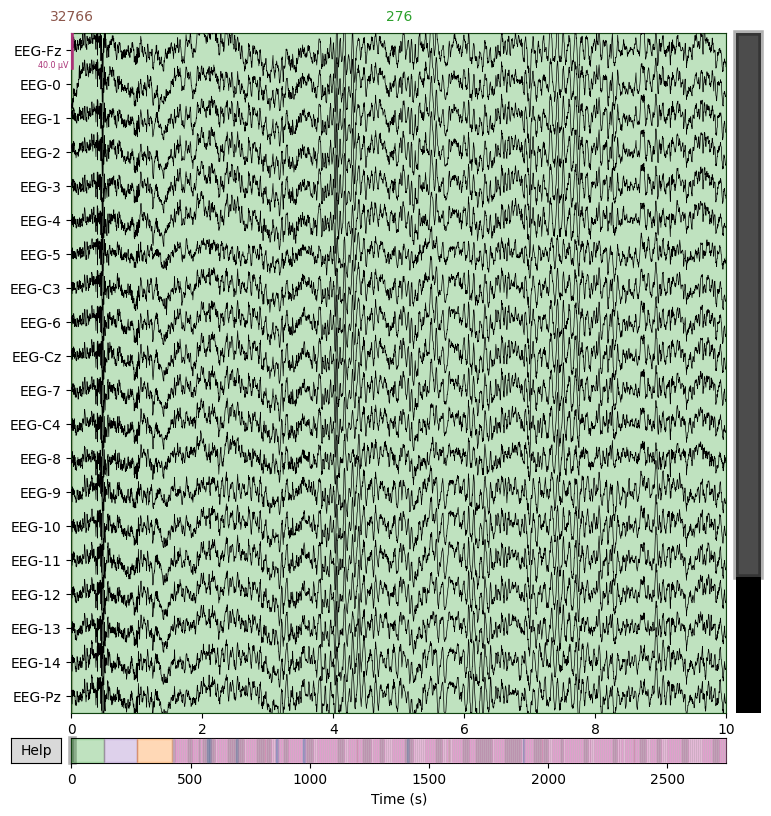

In [117]:
raw.plot()

In [118]:
data.info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-19 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
 subject_info: 4 items (dict)
>

In [119]:
data=data.get_data()

In [120]:
data

array([[ 1.12304687e-05,  9.57031250e-06,  1.06933594e-05, ...,
         2.68554687e-06,  6.49414062e-06,  1.42089844e-05],
       [-2.72460937e-05, -2.25585937e-05, -2.61230469e-05, ...,
         3.02734375e-06,  5.85937500e-06,  9.86328125e-06],
       [ 6.10351562e-06,  7.91015625e-06,  5.61523437e-06, ...,
         3.41796875e-06,  5.85937500e-06,  1.26953125e-05],
       ...,
       [ 3.41796875e-06,  3.90625000e-06,  1.07421875e-05, ...,
         9.76562500e-07,  9.76562500e-06,  1.31835937e-05],
       [ 4.54101562e-05,  4.54101562e-05,  5.22460937e-05, ...,
        -5.37109375e-06, -2.92968750e-06,  8.30078125e-06],
       [-1.26953125e-05, -1.17187500e-05, -2.44140625e-06, ...,
        -8.78906250e-06, -6.34765625e-06,  5.37109375e-06]])

In [121]:
features=data.T

In [122]:
print(len(features))

687000


In [123]:
events,event_ids = mn.events_from_annotations(raw)
print(event_ids)
right_hand_movement = event_ids['768']
left_hand_movement = event_ids['783']
print(mn.count_events(events))

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
{'1023': 1, '1072': 2, '276': 3, '277': 4, '32766': 5, '768': 6, '783': 7}
{1: 7, 2: 1, 3: 1, 4: 1, 5: 9, 6: 288, 7: 288}


In [124]:
#Taking only last two Event_names with List slicing [:,2]
labels = np.array([1 if e == left_hand_movement else 0 if e == right_hand_movement else None for e in events[:, 2]])
#Taking only values which are not None
valid_indices = np.where(labels != None)[0]

labels = labels[valid_indices]

X = features[valid_indices]

In [125]:
channel_names = raw.ch_names

data1 = pd.DataFrame(X, columns=channel_names)
data1['label'] = labels

data1.head(10)
print(channel_names)

['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


In [126]:
X= data1.drop('label',axis=1).values
len(X)

576

In [127]:
Y = data1['label'].values

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [129]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [130]:
Y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=object)

In [131]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [132]:
Y_predict = model.predict(X_test)
Y_predict_2=[]
for i in Y_predict:
  if(i>0.5):
    Y_predict_2.append(1)
  elif(i<0.5):
    Y_predict_2.append(0)
print(len(Y_predict_2))

144


In [133]:
len(Y_test)

144

In [134]:
correct_prediction=0

for i in range(len(Y_test)):
  if Y_test[i]==Y_predict_2[i]:
    correct_prediction+=1

print((correct_prediction/len(Y_test)*100))

41.66666666666667


In [135]:


def gradientDescent(X,Y,learningRate,iterations,cost):
  rows,cols = X.shape
  weights=np.zeros(cols)
  intercept=0
  gradient=0
  for i in range(iterations):
    predictions= X.dot(weights)+intercept
    errors = predictions-Y
    gradients = (1/rows)*(X.T.dot(errors))
    intercept_gradient = (1/rows)*(np.sum(errors))
    weights = weights - (learningRate*gradients)
    intercept = intercept - (learningRate*intercept_gradient)
    cost1 = (1/(2*rows))*(np.sum(errors**2))
    cost.append(cost1)
  return weights,intercept
cost=[]
weights,intercept = gradientDescent(X_train,Y_train,0.0147,1000,cost)

print(weights,intercept)

[3.223698905515216e-06 -1.2392735250112717e-07 9.1346779660704e-07
 1.0006528525774525e-06 1.575956130937599e-06 1.261933441521267e-06
 1.9043713332165027e-06 8.903196539037575e-07 9.671196503164123e-07
 4.550105079925516e-07 8.648924133971263e-07 2.798158323023724e-07
 -3.3883654383095595e-08 8.500109627533233e-08 1.006898096084817e-06
 8.725174812099199e-07 1.0294874435560766e-06 6.631645783052921e-07
 7.317414193843422e-07 1.112229576832464e-06 1.4203101285917445e-06
 1.4650579379549989e-06 2.45112216796075e-06 9.912409135633356e-06
 -3.8141367600657556e-06] 0.5069442564852976


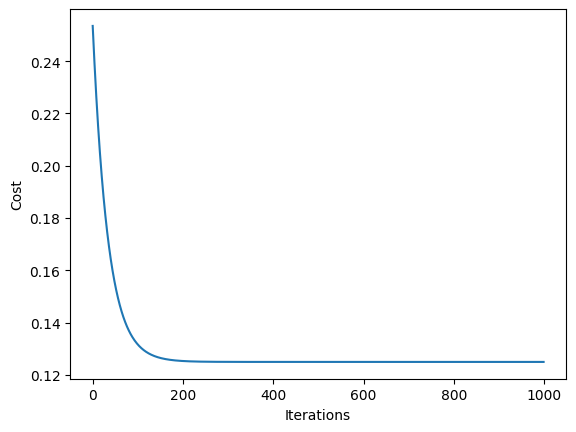

In [136]:
iterations=[i for i in range(1000)]

plt.plot(iterations,cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [137]:
def predict(weights,intercept,X):
  prediction= X.dot(weights)+intercept

  mean = np.mean(prediction)
  result = [1 if (pred>mean) else 0 for pred in prediction]
  return result

def accuracy(Y_predict,Y_test):
  return np.mean(Y_predict==Y_test)
Y_predict = predict(weights,intercept,X_test)
Y_predict
accuracy(Y_predict,Y_test)

0.5208333333333334

In [138]:
#Stochastic Gradient Descent


def stochasticGradientDescent(X,Y,learningRate,iterations,cost1):
  weight=0
  intercept=0
  gradient=0
  for j in range(iterations):
    i = np.random.randint(len(X))
    predictions =X[i].T.dot(weight)+intercept
    errors = predictions-Y[i]
    weights= 2*errors*X
    intercept = 2*errors
    weights-=learningRate*weights
    intercept-=learningRate*intercept
    cost=(1/(2*len(X)))*(np.sum(errors**2))
    cost1.append(cost)
  return weight,intercept
costSGD=[]
weights,intercept=stochasticGradientDescent(X,Y,0.147,1000,costSGD)
print(weights,intercept)


0 [-1.94001559e+232 -1.94001559e+232 -1.94001559e+232 -1.94001559e+232
 -1.94001559e+232 -1.94001559e+232 -1.94001559e+232 -1.94001559e+232
 -1.94001559e+232 -1.94001559e+232 -1.94001559e+232 -1.94001559e+232
 -1.94001559e+232 -1.94001559e+232 -1.94001559e+232 -1.94001559e+232
 -1.94001559e+232 -1.94001559e+232 -1.94001559e+232 -1.94001559e+232
 -1.94001559e+232 -1.94001559e+232 -1.94001559e+232 -1.94001559e+232
 -1.94001559e+232]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-138-cab8a76d5ba7>:16: RuntimeWarning: overflow encountered in square
  cost=(1/(2*len(X)))*(np.sum(errors**2))


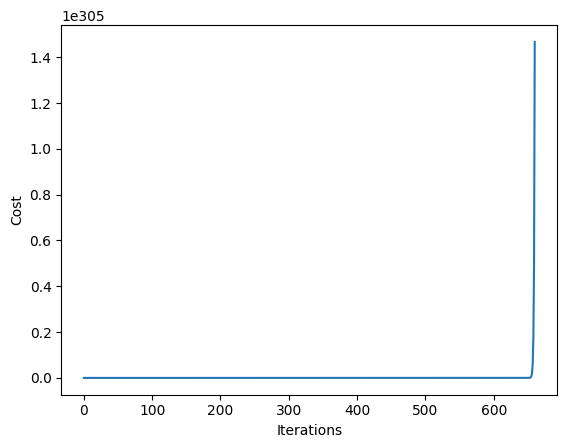

In [139]:
iterations=[i for i in range(1000)]

plt.plot(iterations,costSGD)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [140]:
def batchGradientDescent(X,Y,learningRate,iterations,cost):
  rows,cols = X.shape
  weights=np.zeros(cols)
  intercept=0
  gradient=0
  for i in range(iterations):

    predictions= X.dot(weights)+intercept
    errors = predictions-Y
    gradients = (1/rows)*(X.T.dot(errors))
    intercept_gradient = (1/rows)*(np.sum(errors))
    weights = weights - (learningRate*gradients)
    intercept = intercept - (learningRate*intercept_gradient)
    cost1 = (1/(2*rows))*(np.sum(errors**2))
    cost.append(cost1/len(Y))
  return weights,intercept

costBGD=[]
weights,intercept = batchGradientDescent(X_train,Y_train,0.147,1000,costBGD)

print(weights,intercept)

[1.0157190303290771e-05 -1.3436382468455437e-05 4.532656440955835e-06
 7.286776629985199e-06 1.0741377570656312e-05 8.818179870191008e-06
 9.584920366330091e-06 4.4496937469336276e-06 5.522466682000274e-06
 4.169008837898312e-06 7.77740636810239e-06 2.359820491260948e-06
 1.5315714632339285e-06 -5.01098546221365e-07 1.0218530134786309e-05
 1.3384951661285133e-05 1.198736902501031e-05 6.376377983980762e-06
 1.0024787462198827e-05 1.3164944129468322e-05 1.498333971492073e-05
 1.5282299126541716e-05 -2.7733366482816537e-05 8.295548702217842e-06
 -1.6972279461274417e-05] 0.5069444444786217


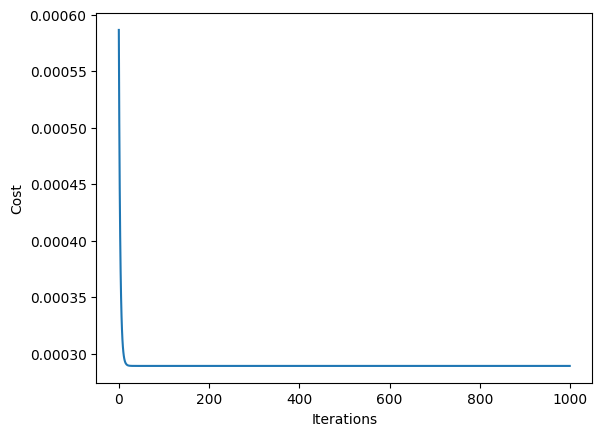

In [141]:
iterations=[i for i in range(1000)]

plt.plot(iterations,costBGD)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [142]:
#Mini-Batch Gradient Descent

def miniBatchGradientDescent(X,Y,learningRate,iterations,cost,batch_size):
  rows,cols = X.shape
  weights=np.zeros(cols)
  intercept=0
  gradient=0
  n=len(Y)
  for i in range(iterations):
    indices = list(range(n))
    np.random.shuffle(indices)
    for start in range(0, n, batch_size):
          end = min(start + batch_size, n)
          X_batch= np.array([X[i] for i in indices[start:end]])
          Y_batch = np.array([Y[i] for i in indices[start:end]])

          predictions= X_batch.dot(weights)+intercept
          errors = predictions-Y_batch
          gradients = (1/rows)*(X_batch.T.dot(errors))
          intercept_gradient = (1/rows)*(np.sum(errors))
          weights = weights - (learningRate*gradients)
          intercept = intercept - (learningRate*intercept_gradient)
    predictions = X.dot(weights)+intercept
    errors = predictions-Y
    cost1 = (1/(2*rows))*(np.sum(errors**2))
    cost.append(cost1/len(Y))
  return weights,intercept
costMBGD=[]
weights,intercept = miniBatchGradientDescent(X_train,Y_train,0.00147,1000,costMBGD,3)

print(weights,intercept)



[ 1.96627849e-06  8.95719255e-07  4.33983743e-07  3.02562616e-07
  5.31218921e-07  4.09206723e-07  8.94673110e-07  4.20609513e-07
  4.05600244e-07  7.38781419e-08  1.51381241e-07  6.06227652e-08
 -1.42639880e-07  1.09095901e-07  8.95587136e-08 -2.59678079e-07
 -2.30582682e-08  8.53259993e-08 -1.28395355e-07 -4.08560613e-08
  8.39424065e-08  9.94714229e-08  4.13486886e-06  7.75368250e-06
 -1.95750398e-06] 0.3903855555218972


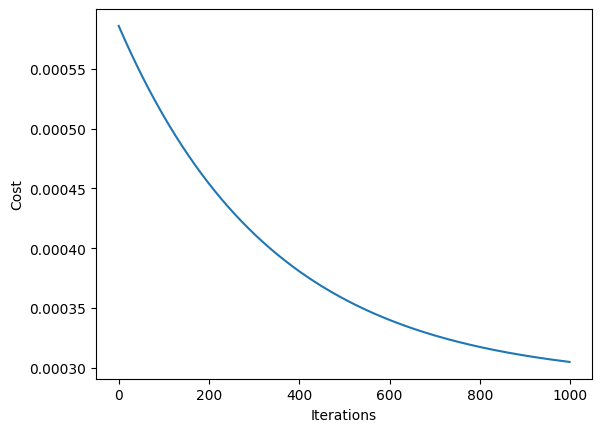

In [143]:
iterations=[i for i in range(1000)]

plt.plot(iterations,costMBGD)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

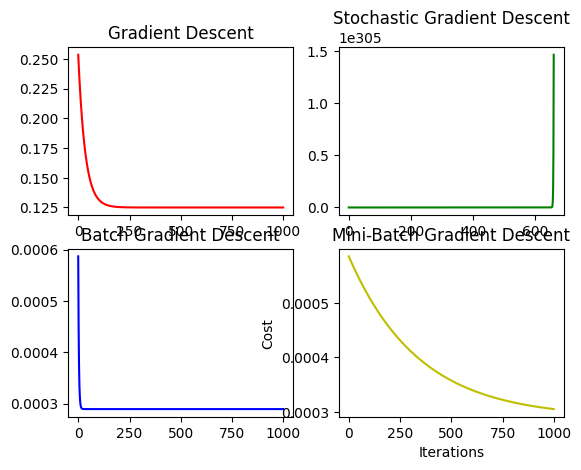

In [174]:
fig,axis =plt.subplots(2,2)
plot1=axis[0,0]
plot1.set_title('Gradient Descent')
plot2=axis[0,1]
plot2.set_title('Stochastic Gradient Descent')
plot3=axis[1,0]
plot3.set_title('Batch Gradient Descent')
plot4=axis[1,1]
plot4.set_title('Mini-Batch Gradient Descent')
iter=1000
iter1=[i for i in range(iter)]
plot1.plot(iter1,cost[0:iter],label='Gradient Descent',color='r')
plot2.plot(iter1,costSGD[0:iter],label='Stochastic Gradient Descent',color='g')
plot3.plot(iter1,costBGD[0:iter],label='Batch Gradient Descent',color='b')
plot4.plot(iter1,costMBGD[0:iter],label='Mini-Batch Gradient Descent',color='y')
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.show()
